# Introduction
### MNIST dataset
Handwritten digits dataset <br> 
Our goal here is to correctly identify digits from handwritten digits

# Importing the necessarry Libraries for Data Analysis
We'll be using the following libraries to perform data analysis 

In [1]:
# Importing required libraries

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading data and other preparations
We've loaded the data into training and testing datasets <br>
Further we've loaded the input and output (class) dataset as well

In [2]:
mnist_train = pd.read_csv("digit-recognizer/train.csv")
mnist_test = pd.read_csv("digit-recognizer/test.csv")

In [3]:
# Print mnist training dataset

mnist_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Print mnist test dataset

mnist_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Understanding the Dataset
We clearly see that there are **42,000 training examples** and **28,000 testing examples** with a total of **60,000 grayscale data** as a part of the dataset <br>
Also, the images are of **28x28 pixels** flattened out into **an array of size 784**

# Design and Target
We'll now split the training and testing datasets into **design and target** <br>

In [5]:
# For x_train, we just need to drop the "labels" column
# Axis is by default 0 in .drop meaning that by default row gets dropped
# Axis = 1 here means that we're dropping a column

x_train = mnist_train.drop(labels = "label", axis = 1)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# For y_train we just need the "labels" column

y_train = mnist_train["label"]
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# Normalization
Normalization is required to bring out dataset to a **common scale**

In [7]:
x_train = x_train/255.0
mnist_test = mnist_test/255.0

In [8]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [9]:
print(mnist_test.shape)

(28000, 784)


# Resizing the 1D matrix into a 3D matrix
Here, we are transforming the **1D matrix** of size **784** to a **3D matrix** of size **28x28x1**

In [10]:
# -1 means that we want to keep all the values, that is the initial size intact
# 28x28x1 means 28 rows, 28 columns and 1 channel
# The 1 channel will have values ranging from 0 to 1
# For RGB, we would have had a 3 channel system 

x_train = x_train.values.reshape(-1,28,28,1)
mnist_test = mnist_test.values.reshape(-1,28,28,1)
x_train.shape

(42000, 28, 28, 1)

# One Hot Encoding
Here, we'll convert our labels in y_train as a one-hot-encoded vector

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [12]:
print(y_train[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Visualize the Dataset
Here, we plot the first 20 entries of the dataset using matplotlib library

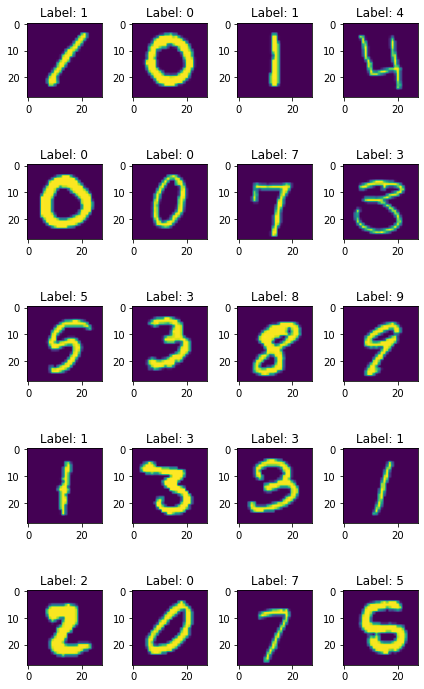

In [13]:
num = 20
images = x_train[:num]

num_row = 5
num_col = 4

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='viridis')
    ax.set_title('Label: {}'.format(y_train[i].tolist().index(1.0, 0, 10)))
plt.tight_layout()
plt.show()

# Training and Validation set
Split the training data into training and validation sets

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)
print(x_train.shape)
print(x_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


# Convolutional Neural Network using Keras
Here, we build our learning model, which will be a convolutional neural network

In [15]:
input_layer = tf.keras.layers.Input(shape = (28, 28, 1))

hidden_layer_1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.keras.activations.relu)(input_layer)
norm_1 = tf.keras.layers.BatchNormalization()(hidden_layer_1)
max_1 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(norm_1)
dropout_layer_1 = tf.keras.layers.Dropout(0.25)(max_1)

hidden_layer_2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.keras.activations.relu)(dropout_layer_1)
norm_2 = tf.keras.layers.BatchNormalization()(hidden_layer_2)
max_2 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(norm_2)

flatten_layer = tf.keras.layers.Flatten()(max_2)
dropout_layer_2 = tf.keras.layers.Dropout(0.25)(flatten_layer)

hidden_layer_3 = tf.keras.layers.Dense(256, activation=tf.keras.activations.relu)(dropout_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)(hidden_layer_3)

dropout_layer_3 = tf.keras.layers.Dropout(0.5)(hidden_layer_4)

output_layer = tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)(dropout_layer_3)

In [16]:
model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)       

# Plot of model graph

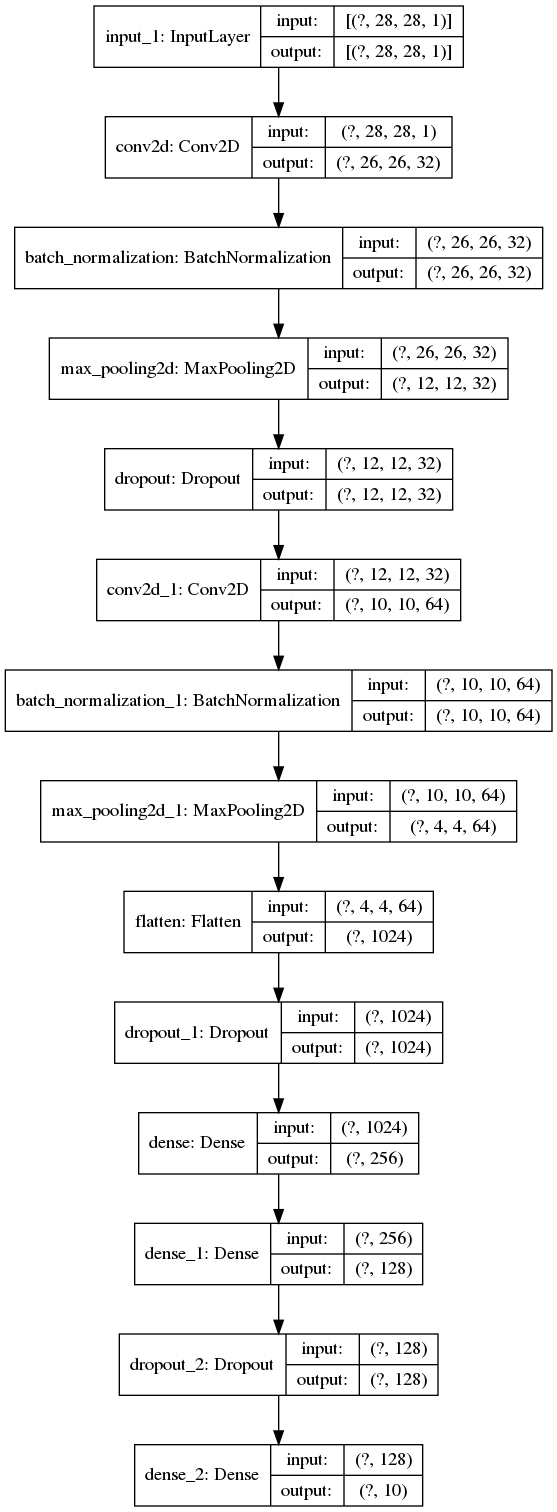

In [17]:
tf.keras.utils.plot_model(model, "digit_classifier_model.png", show_shapes=True)

# Loading the model
Here, we load our CNN with optimizer, loss function and evaluation metric

In [18]:
# Here, we are using Adam optimiser
# The loss function is categorical crossentropy function 

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

# Training our model
Here, we are training our **convolutional neural network** on the testing and validation data

In [19]:
his = model.fit(x_train, y_train, batch_size = 1000, epochs = 20, validation_data=(x_val, y_val))

Epoch 1/20
38/38 [==============================] - 16s 424ms/step - loss: 1.6605 - accuracy: 0.4674 - val_loss: 2.2268 - val_accuracy: 0.2452
Epoch 2/20
38/38 [==============================] - 16s 409ms/step - loss: 0.5580 - accuracy: 0.8555 - val_loss: 2.4444 - val_accuracy: 0.1940
Epoch 3/20
38/38 [==============================] - 15s 399ms/step - loss: 0.2447 - accuracy: 0.9385 - val_loss: 2.7407 - val_accuracy: 0.2929
Epoch 4/20
38/38 [==============================] - 15s 387ms/step - loss: 0.1595 - accuracy: 0.9570 - val_loss: 3.1721 - val_accuracy: 0.2757
Epoch 5/20
38/38 [==============================] - 15s 389ms/step - loss: 0.1247 - accuracy: 0.9676 - val_loss: 3.1590 - val_accuracy: 0.2695
Epoch 6/20
38/38 [==============================] - 15s 387ms/step - loss: 0.0987 - accuracy: 0.9728 - val_loss: 2.9743 - val_accuracy: 0.3036
Epoch 7/20
38/38 [==============================] - 15s 386ms/step - loss: 0.0877 - accuracy: 0.9764 - val_loss: 2.8406 - val_accuracy: 0.3526

## Plotting model accuracy
We plot the model accuracies for both training and testing data

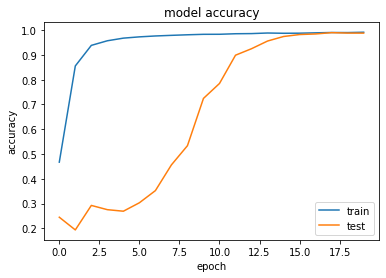

In [20]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Plotting model loss
We plot the model loss for both training and testing data

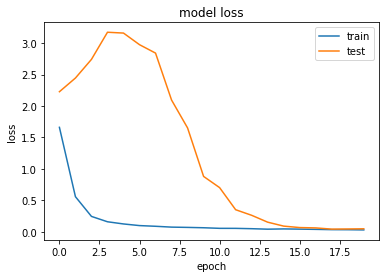

In [21]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Confusion Matrix
A confusion matrix can very well describe the performance of a classification model <br>
We'll plot one for our CNN model here

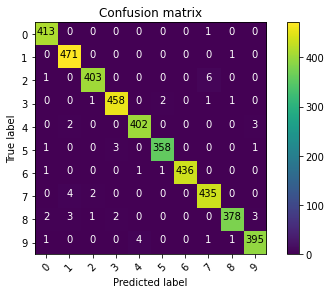

In [22]:
# Lets plot the confusion matrix 

def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.viridis):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

### We can clearly see that our model failed to identify a lot of 4s correctly, rather it classified them as 9s 

# Displaying the error results and further analysis
So here, we are trying to display the digits which our model failed to recognize correctly <br>
Some of these are very trivial mistakes while the later ones are quite genuine and any human can easily mistake them for other digits just like our model did here

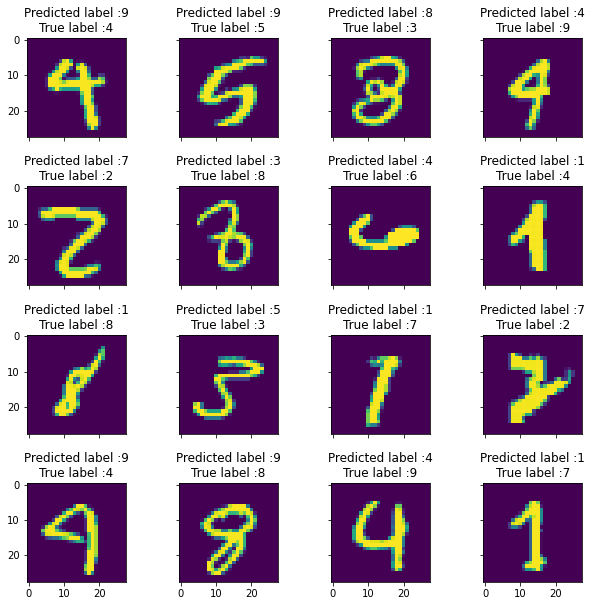

In [23]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_val_errors = x_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 4
    ncols = 4
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(10,10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 16 errors 
most_important_errors = sorted_dela_errors[-16:]

# Show the top 16 errors
display_errors(most_important_errors, x_val_errors, y_pred_classes_errors, y_true_errors)

# Final Result
So here is the final result of our model :)

In [24]:
# predict results
results = model.predict(mnist_test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_result.csv",index=False)

In [26]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
